In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

boston_data = load_boston()

x = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
y = boston_data.target

x.head()

/Users/zhenechkkaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<AxesSubplot:>

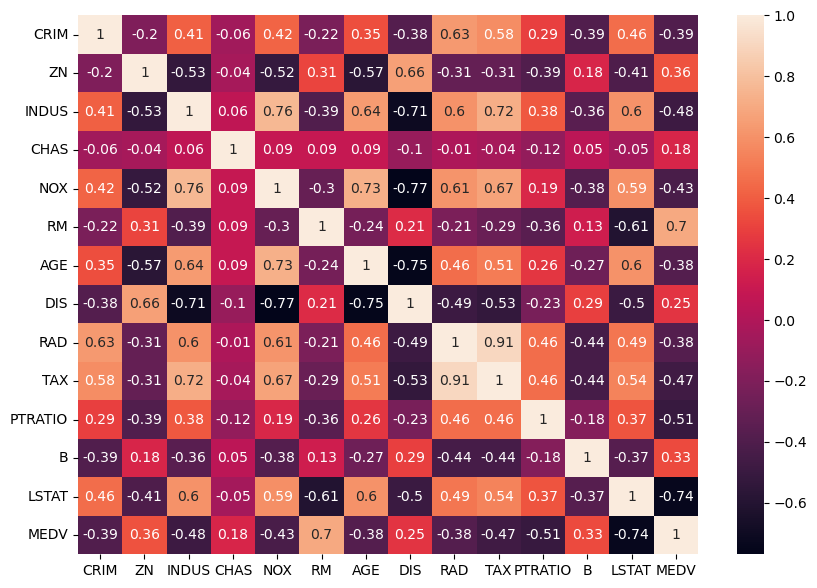

In [2]:
x_corr = x.copy()
x_corr['MEDV'] = y
correlation_matrix = x_corr.corr().round(2)
plt.subplots(figsize=(10,7))
sns.heatmap(data=correlation_matrix, annot=True)

### 1-2. Взять все признаки из датасета с урока. Применить модель Random Forest. Рассчитайте MAE, MSE, R2 на тренировочной и тестовой выборке.

In [3]:
features = [['LSTAT','RM'], ['LSTAT','RM', 'PTRATIO'], ['LSTAT','RM', 'PTRATIO', 'TAX'], ['DIS', 'AGE'], ['DIS', 'RAD']]

In [4]:
metrics = pd.DataFrame(columns=['Features', 'MAE train', 'MAE test', 'MSE train', 'MSE test', 'R2 train', 'R2 test'])
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

for future in features:
  x_future_test = x.loc[:, future]
  x_train, x_test, y_train, y_test = train_test_split(x_future_test, y, test_size = 0.2, random_state=5, shuffle=True)

  regr = RandomForestRegressor()
  regr.fit(x_train, y_train)
  pred_train = regr.predict(x_train)
  pred_test = regr.predict(x_test)
  
  metrics = metrics.append({'Features' : future, 
                            'MAE train' : mean_absolute_error(y_train, pred_train), 
                            'MAE test' : mean_absolute_error(y_test, pred_test), 
                            'MSE train' : mean_squared_error(y_train, pred_train), 
                            'MSE test' : mean_squared_error(y_test, pred_test), 
                            'R2 train' : r2_score(y_train, pred_train), 
                            'R2 test' : r2_score(y_test, pred_test)}, ignore_index=True)

print(metrics)

/var/folders/h9/dr0bspp11z53mwzrlvr3q19w0000gn/T/ipykernel_6357/1007127158.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
/var/folders/h9/dr0bspp11z53mwzrlvr3q19w0000gn/T/ipykernel_6357/1007127158.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,


                    Features  MAE train  MAE test  MSE train   MSE test  R2 train   R2 test
0                [LSTAT, RM]   1.231629  3.339559   3.446727  18.847244  0.959876  0.759276
1       [LSTAT, RM, PTRATIO]   1.094198  2.717373   2.823376  12.759123  0.967132  0.837035
2  [LSTAT, RM, PTRATIO, TAX]   0.946260  2.458500   1.988279  11.579318  0.976854  0.852104
3                 [DIS, AGE]   2.449079  5.867029  12.282333  68.732489  0.857019  0.122122
4                 [DIS, RAD]   2.357795  4.592284  12.439344  41.155234  0.855191  0.474349


/var/folders/h9/dr0bspp11z53mwzrlvr3q19w0000gn/T/ipykernel_6357/1007127158.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
/var/folders/h9/dr0bspp11z53mwzrlvr3q19w0000gn/T/ipykernel_6357/1007127158.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,
/var/folders/h9/dr0bspp11z53mwzrlvr3q19w0000gn/T/ipykernel_6357/1007127158.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({'Features' : future,


### 3. Посмотрите, как показатели качества соотносятся с коэффициентом корреляции этих признаков и целевого значения, а также между собой.

#### Чем выше коэффициент корреляции признаков и целевого значения, тем меньше отклонение и, соответственно, точнее прогнозируемые значения. Значение корреляции нецелевых признаков не оказывает большого влияния на точность прогноза (значения по ['DIS', 'RAD'] оказались немного лучше, чем ['DIS', 'AGE'], хотя коэффицент корреляции этих показателей ниже при равной коррекляции с целевым показателем)

### 4. Сравнить показатели качества новой модели с моделью с урока и сделать вывод.

#### Значения средней абсолютной ошибки ниже, чем полученные методом линейной регрессии, однако разница между значениями тестовой и тренировочной моделями гораздо больше. Аналогично произошло и со значениями среднеквадратичного отклонения. 
#### Посмотрим на значения коэффициента детерминации. Они выше, чем полученные на уроке, стремяться к 1, но разница между значениями тестовой и тренировочной моделей большая.
#### Таким образом, метод линейной регрессии для нашего примера дает более точные прогнозы, чем метод Random Forest